# III. 🤖 Model Building

Predicting the salary based on job state, company rating, company industry and other variables.

#### Importing essential librairies

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,data engineer,na,"['python', 'java', 'sql']",[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,3.9,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,data engineer,na,['sql'],['snowflake'],['ssis'],['snowflake'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,data engineer,na,"['sql', 'python']","['aws', 'databricks']",[],[],['spark'],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",115173,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,data engineer,na,['python'],[],['tableau'],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,data engineer,na,['sql'],[],['tableau'],['oracle'],[],[],bachelor,5-10 years


#### Feature Engineering

Making a new dataframe with relevant features for the regression model

In [4]:
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,CA,na,NaN,0-2 years,Information Technology Support Services,4.7,70000
1,MS,na,bachelor,2-5 years,NaN,3.9,76500
2,Remote,na,master,0-2 years,Biotech & Pharmaceuticals,4.4,121500
3,CA,na,NaN,NaN,Computer Hardware Development,4.2,115173
4,MD,na,bachelor,5-10 years,NaN,5.0,117000


Dropping some states and company industries that have below 5 data points.

In [5]:
jobstate_count = df_model['job_state'].value_counts()
jobstate_count

Remote            178
CA                114
TX                109
VA                 55
MA                 42
                 ... 
Missouri            1
WV                  1
ID                  1
PR                  1
North Carolina      1
Name: job_state, Length: 61, dtype: int64

In [6]:
states_g5 = jobstate_count[jobstate_count > 5].index.tolist()

df_model = df_model[df_model["job_state"].isin(states_g5)]
df_model['job_state'].value_counts()

Remote    178
CA        114
TX        109
VA         55
MA         42
GA         41
NJ         37
IL         37
NY         33
DC         32
OH         28
FL         27
NC         27
PA         26
WA         23
MN         22
CO         17
MD         17
OR         16
UT         13
WI         13
AZ         11
MO         11
TN          8
CT          8
MI          8
DE          7
IN          6
NV          6
Name: job_state, dtype: int64

### For the Predict Salary page

In [7]:
df_model['company_rating'].unique()

array([4.7, 4.4, 4.2, 5. , 2.7, 3.8, 4.8, 4.1, 1. , 3.1, 3.5, 4. , 4.5,
       3.9, 4.3, 3.2, 2.6, 3.6, 4.9, 2.8, 4.6, 3.7, 3.4, 3. , 3.3, 2. ,
       2.9, 2.5, 2.3, 2.2, 1.3, 1.8])

In [8]:
df_model['company_industry'].unique()

array(['Information Technology Support Services',
       'Biotech & Pharmaceuticals', 'Computer Hardware Development', nan,
       'Health Care Services & Hospitals', 'Internet & Web Services',
       'HR Consulting', 'Consumer Product Manufacturing',
       'Investment & Asset Management', 'Accounting & Tax',
       'Business Consulting', 'Enterprise Software & Network Solutions',
       'Financial Transaction Processing', 'Staffing & Subcontracting',
       'Banking & Lending', 'Travel Agencies',
       'Airlines, Airports & Air Transportation', 'Sports & Recreation',
       'National Agencies', 'Aerospace & Defense', 'Software Development',
       'Beauty & Wellness', 'Publishing', 'Food & Beverage Manufacturing',
       'Energy & Utilities', 'Advertising & Public Relations',
       'Wholesale', 'Department, Clothing & Shoe Stores',
       'Machinery Manufacturing', 'Crop Production',
       'Colleges & Universities', 'Research & Development',
       'Pet & Pet Supplies Stores', 'Re

One Hot Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_state = LabelEncoder()
df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([ 1, 22, 11, 10,  7, 24, 13, 18, 26, 16,  4, 28,  8, 20, 21, 25, 19,
        5, 23,  2, 15,  6,  0,  3, 27, 14, 12,  9, 17])

In [11]:
le_sen = LabelEncoder()
df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [12]:
le_edu = LabelEncoder()
df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 1, 0])

In [13]:
le_indu = LabelEncoder()
df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([44,  7, 18, 77, 41, 47, 39, 20, 48,  0, 11, 29, 32, 69,  5, 74,  3,
       68, 56,  2, 67,  6, 60, 33, 28,  1, 76, 24, 51, 22, 16, 63, 58, 61,
       71, 26, 54, 73, 13, 53, 64, 75, 38, 45, 34, 46, 70, 15, 36,  9, 12,
       66,  4, 72, 65, 52, 49, 27, 14, 30,  8, 50, 23, 31, 19, 43, 57, 17,
       37, 35, 55, 59, 62, 40, 25, 42, 10, 21])

In [14]:
unique_company_ratings = np.sort(df_model['company_rating'].unique())
unique_company_ratings

array([1. , 1.3, 1.8, 2. , 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [15]:
le_rating = LabelEncoder()
df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([28, 25, 23, 31,  8, 19, 29, 22,  0, 12, 16, 21, 26, 20, 24, 13,  7,
       17, 30,  9, 27, 18, 15, 11, 14,  3, 10,  6,  5,  4,  1,  2],
      dtype=int64)

In [16]:
le_exp = LabelEncoder()
df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 4, 3, 0, 2])

In [17]:
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,1,0,2,1,44,28,70000
2,22,0,1,1,7,25,121500
3,1,0,2,4,18,23,115173
4,11,0,0,3,77,31,117000
5,10,0,0,0,41,8,94536


<Axes: >

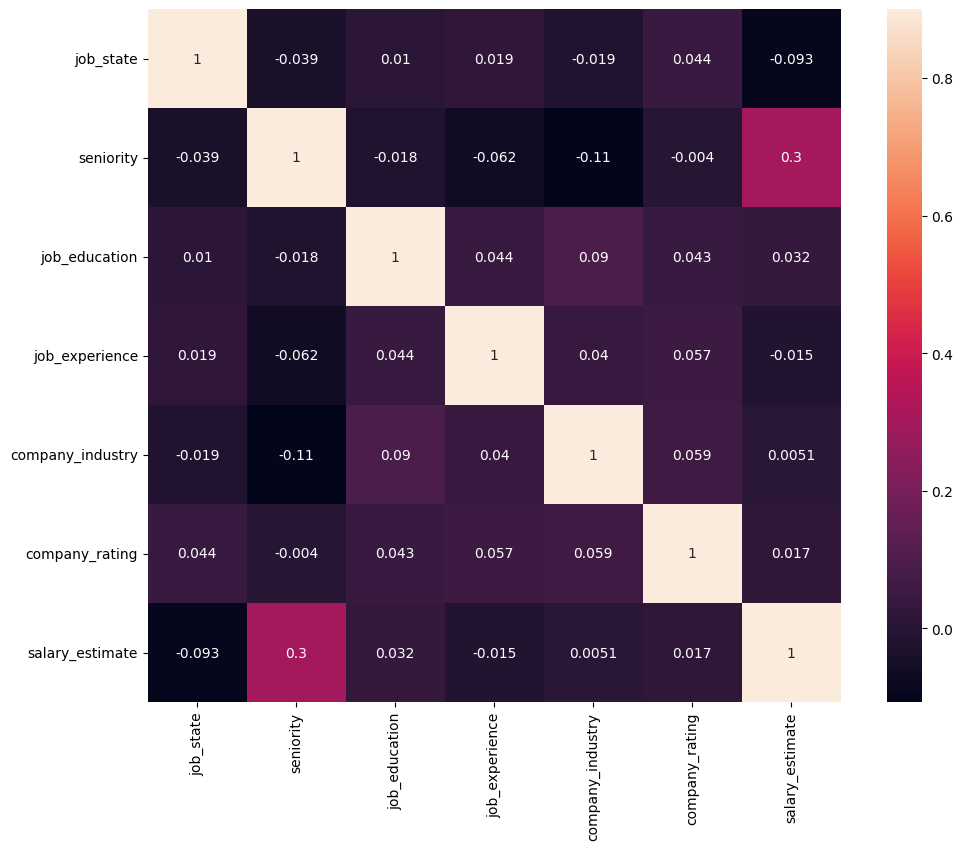

In [18]:
corrmat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, square=True)

The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the job experience needed and the job state.

### Multiple Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
predictions = model.predict(X_test)

In [25]:
print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, predictions), 2)}')

Mean Absolute Error : $15714.24


In [26]:
error = np.sqrt(mean_squared_error(y_test, predictions))
print("Error : ${:,.02f}".format(error))   

Error : $19,960.13


### Random Forest Regressor Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [29]:
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [30]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, y_pred), 2)}')
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error : ${:,.02f}".format(error))    

Mean Absolute Error : $15259.37
Error : $19,566.85


In [31]:
errors = abs(y_pred - y_test)

In [32]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 85.5 %


Training the model on all the dataset so we can export it and use it in production

In [33]:
regressor.fit(X, y)

RandomForestRegressor(max_depth=4, random_state=0)

Variable Importances

In [34]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: seniority            Importance: 0.4
Variable: job_state            Importance: 0.28
Variable: company_industry     Importance: 0.13
Variable: company_rating       Importance: 0.13
Variable: job_experience       Importance: 0.04
Variable: job_education        Importance: 0.02


[None, None, None, None, None, None]

Let's test our model on an example

In [35]:
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [36]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 1.,  1.,  0.,  1., 44., 26.]])

In [37]:
y_pred = regressor.predict(X_example)
salary = int(y_pred[0])
print(f"Predicted salary: ${salary:,}")

Predicted salary: $128,369


c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


For a senior data engineer who's looking to work in California (CA) state, with a bachelor, 0-2 years of experience and in a company in the IT Support Services industry that has a 4.5 rating on Glassdoor, he is expected to get $128,369 /year.

Exporting the model to a pickle file

In [38]:
import pickle

data = {"model": regressor, "le_state": le_state, "le_sen": le_sen, "le_edu": le_edu, "le_exp": le_exp, "le_indu": le_indu, "le_rating": le_rating}

with open('../models/model_salary_pred.pkl', 'wb') as file:
    pickle.dump(data, file)

Let's test our model after importing it from the pickle file

In [39]:
with open('../models/model_salary_pred.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_state = data["le_state"]
le_sen = data["le_sen"]
le_edu = data["le_edu"]
le_exp = data["le_exp"]
le_indu = data["le_indu"]
le_rating = data["le_rating"]

In [40]:
y_pred = regressor_loaded.predict(X_example)
salary = int(y_pred[0])
print(f"Predicted salary: ${salary:,}")

Predicted salary: $128,369


c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
